In [ ]:
include("src/sets.jl")

using ..HllSets
using ITensors

In [ ]:
i = Index(3)
j = Index(4)
k = Index(3)
l = Index(6)

In [ ]:
A = ITensor(i)
B = ITensor(j,i)
C = ITensor(l,j,k)

In [ ]:
D = A * B * C

In [ ]:
bins = Index(1024)
z = Index(64)

hll_1 = ITensor(bins, z)

In [ ]:
hll_2 = ITensor(bins, z)

In [ ]:
hll_1 == hll_2

In [ ]:
hll_1[bins => 2, z => 1] = 1
hll_2[bins => 8, z => 4] = 1

hll_1 == hll_2

In [ ]:
hll_2
hll_2[bins => 2, z => 1]
bins_p = prime(bins)
@show plev(bins_p)

In [ ]:
# Assuming ITensor has a method to set data like this:
function set_data!(tensor::ITensor, data::Matrix{Bool})
    # Assuming ITensor has a method to set elements
    for idx in CartesianIndices(data)
        tensor[idx] = data[idx]
    end
end


In [ ]:
# Step 1: Define the Indices
i = Index(1024, "i")
j = Index(1024, "j")
k = Index(64, "k")

# Example Vector{BitVector}
bit_vectors1 = [BitVector(rand(Bool, 1024)) for _ in 1:64]
bit_vectors2 = [BitVector(rand(Bool, 1024)) for _ in 1:64]

# Step 2: Convert Vector{BitVector} to Matrices
matrix1 = hcat(bit_vectors1...)
matrix2 = hcat(bit_vectors2...)

# Ensure the resulting matrices are 2-dimensional
matrix1 = reshape(matrix1, 1024, 64)
matrix2 = reshape(matrix2, 1024, 64)

# Convert BitMatrix to Matrix{Bool}
matrix1_bool = convert(Matrix{Bool}, matrix1)
matrix2_bool = convert(Matrix{Bool}, matrix2)

# Step 3: Create the ITensors
A = ITensor(i, k)
B = ITensor(j, k)


# Verify the dimensions
println("Dimensions of matrix1_bool: ", size(matrix1_bool))
println("Dimensions of matrix2_bool: ", size(matrix2_bool))
println("Dimensions of ITensor A: ", dims(A))
println("Dimensions of ITensor B: ", dims(B))

# Set the data of the ITensors
# set_data!(A, convert(Matrix{Float64}, matrix1_bool))
# set_data!(B, convert(Matrix{Float64}, matrix2_bool))
# Set the data of the ITensors
for idx in 1:size(matrix1_bool, 1)
    for jdx in 1:size(matrix1_bool, 2)
        A[i=>idx, k=>jdx] = Float64(matrix1_bool[idx, jdx])
        B[j=>idx, k=>jdx] = Float64(matrix2_bool[idx, jdx])
    end
end
# Step 4: Perform the Tensor Contraction
AB = A * B

# Print the diagonal elements of the resulting tensor
println("Diagonal Elements of Tensor AB:")
for idx in 1:1024
    println("AB[$idx, $idx] = ", AB[i=>idx, j=>idx])
end
# Print the resulting tensor
# println("Resulting Tensor: ", AB)

In [ ]:
# Step 1: Define the Indices
i = Index(2, "i")  # Binary variable
j = Index(2, "j")  # Binary variable
k = Index(2, "k")  # Binary variable

# Step 2: Create the ITensors
# Example data for conditional probabilities
P_A = ITensor(i)
P_B_given_A = ITensor(i, j)
P_C_given_B = ITensor(j, k)
P_C_given_A = ITensor(i, k)  # New tensor for P(C|A)

# Set the data for the ITensors
P_A[i=>1] = 0.6
P_A[i=>2] = 0.4

P_B_given_A[i=>1, j=>1] = 0.7
P_B_given_A[i=>1, j=>2] = 0.3
P_B_given_A[i=>2, j=>1] = 0.2
P_B_given_A[i=>2, j=>2] = 0.8

P_C_given_B[j=>1, k=>1] = 0.9
P_C_given_B[j=>1, k=>2] = 0.1
P_C_given_B[j=>2, k=>1] = 0.4
P_C_given_B[j=>2, k=>2] = 0.6

P_C_given_A[i=>1, k=>1] = 0.8
P_C_given_A[i=>1, k=>2] = 0.2
P_C_given_A[i=>2, k=>1] = 0.3
P_C_given_A[i=>2, k=>2] = 0.7

# Step 3: Define the Bayesian Network Structure
# In this example, we have a simple chain: A -> B -> C

# Step 4: Perform Tensor Operations
# Compute the joint probability P(A, B, C)
P_AB = P_A * P_B_given_A
P_ABC = P_AB * P_C_given_B # * P_C_given_A

println(dim(P_ABC))


In [ ]:
# Step 1: Define the Indices
i = Index(2, "i")  # Binary variable
j = Index(2, "j")  # Binary variable
k = Index(2, "k")  # Binary variable

# Step 2: Create the ITensors
# Example data for conditional probabilities
P_A = ITensor(i)
P_B_given_A = ITensor(i, j)
P_C_given_B = ITensor(j, k)
P_C_given_A = ITensor(i, k)  # New tensor for P(C|A)

# Set the data for the ITensors
P_A[i=>1] = 0.6
P_A[i=>2] = 0.4

P_B_given_A[i=>1, j=>1] = 0.7
P_B_given_A[i=>1, j=>2] = 0.3
P_B_given_A[i=>2, j=>1] = 0.2
P_B_given_A[i=>2, j=>2] = 0.8

P_C_given_B[j=>1, k=>1] = 0.9
P_C_given_B[j=>1, k=>2] = 0.1
P_C_given_B[j=>2, k=>1] = 0.4
P_C_given_B[j=>2, k=>2] = 0.6

P_C_given_A[i=>1, k=>1] = 0.8
P_C_given_A[i=>1, k=>2] = 0.2
P_C_given_A[i=>2, k=>1] = 0.3
P_C_given_A[i=>2, k=>2] = 0.7

# Step 3: Define the Bayesian Network Structure
# In this example, we have a simple chain: A -> B -> C

# Step 4: Perform Tensor Operations
# Compute the joint probability P(A, B)
P_AB = P_A * P_B_given_A
P_AC = P_A * P_C_given_A

# Compute the joint probability P(A, B, C)
P_ABC = P_AB * P_C_given_B

# Print the dimensions of the joint probability tensor
println("Dimensions of P_ABC: \n", P_ABC, "\n", P_AB, "\n", P_AC, "\n")

In [ ]:
using Flux

# Step 1: Define the Probabilities
P_A = [0.6, 0.4]
P_B_given_A = [0.7 0.3; 0.2 0.8]
P_C_given_B = [0.9 0.1; 0.4 0.6]
P_C_given_A = [0.8 0.2; 0.3 0.7]

# Step 2: Perform Tensor Operations
# Compute the joint probability P(A, B)
P_A_expanded = reshape(P_A, 2, 1)
P_AB = P_A_expanded .* P_B_given_A

# Compute the joint probability P(A, C)
P_AC = P_A_expanded .* P_C_given_A

# Compute the joint probability P(A, B, C)
P_AB_expanded = reshape(P_AB, 2, 2, 1)
P_ABC = P_AB_expanded .* reshape(P_C_given_B, 1, 2, 2)

# Step 3: Print the dimensions and values of the joint probability tensor
println("Dimensions of P_ABC: ", size(P_ABC))
println("P_ABC: ", P_ABC)
println("P_AB: ", P_AB)
println("P_AC: ", P_AC)

# Print the joint probability tensor values
for i in 1:2
    for j in 1:2
        for k in 1:2
            println("P(A=$(i-1), B=$(j-1), C=$(k-1)) = ", P_ABC[i, j, k])
        end
    end
end

In [ ]:
# Example events (collections of events)
events = [
    Set([1, 2, 3]),  # Event 1
    Set([2, 3, 4]),  # Event 2
    Set([3, 4, 5]),  # Event 3
    Set([1, 5, 6])   # Event 4
]

# Number of events
num_events = length(events)

# Initialize the conditional probability matrix
C = zeros(Float64, num_events, num_events)

# Fill the matrix according to the given rules
for i in 1:num_events
    for j in 1:num_events
        if i == j
            C[i, j] = 1.0
        elseif i < j
            C[i, j] = length(intersect(events[i], events[j])) / length(events[j])
        else
            C[i, j] = length(intersect(events[i], events[j])) / length(events[i])
        end
    end
end

println("Conditional Probability Matrix C:")
println(C)

In [ ]:
# Initialize the joint probability tensor with the first event's probabilities
P_joint = reshape(C[:, 1], num_events, 1)

# Compute the joint probability tensor iteratively
for i in 2:num_events
    P_joint = reshape(P_joint, size(P_joint)..., 1) .* reshape(C[:, i], 1, num_events)
end

println("Dimensions of P_joint: ", size(P_joint))

In [ ]:
# Example: Given evidence that Event 2 has occurred, compute P(Event 1, Event 3, Event 4 | Event 2)

# Ensure P_joint has the correct dimensions
if size(P_joint, 2) >= 2
    # Extract the slice of the joint probability tensor where Event 2 has occurred
    P_given_E2 = P_joint[:, 2, :]

    # Normalize the posterior distribution
    P_given_E2 = P_given_E2 / sum(P_given_E2)

    # Print the posterior probabilities
    println("Posterior probabilities given Event 2:", num_events)
    num_rows, num_cols = size(P_given_E2)
    for i in 1:num_rows
        for j in 1:num_cols
            println("P(Event $i, Event $j | Event 2) = ", P_given_E2[i, j])
        end
    end
else
    println("Error: P_joint does not have the expected dimensions.")
end

In [ ]:
# Define the pool of elements and their frequencies
pool = Set([1, 2, 3, 4, 5])
freq_pool = Dict(1 => 5, 2 => 3, 3 => 2, 4 => 4, 5 => 1)

# Define the sets
set_A = Set([1, 2, 3])
set_B = Set([2, 3, 4])
set_C = Set([1, 5, 3])

# Function to calculate weighted conditional probability
function weighted_conditional_probability(set_A, set_B, freq_pool)
    intersection = intersect(set_A, set_B)
    numerator = sum(freq_pool[x] for x in intersection)
    denominator = sum(freq_pool[x] for x in set_B)
    return numerator / denominator
end

# Number of events
num_events = 3

# Initialize the conditional probability matrix
C = zeros(Float64, num_events, num_events)

# Fill the matrix according to the given rules
sets = [set_A, set_B, set_C]
for i in 1:num_events
    for j in 1:num_events
        if i == j
            C[i, j] = 1.0
        else
            C[i, j] = weighted_conditional_probability(sets[i], sets[j], freq_pool)
        end
    end
end

println("Conditional Probability Matrix C:")
println(C)

# Step 2: Perform Tensor Operations
# Initialize the joint probability tensor with the first event's probabilities
P_joint = reshape(C[:, 1], num_events, 1)

# Compute the joint probability tensor iteratively
for i in 2:num_events
    P_joint = reshape(P_joint, size(P_joint)..., 1) .* reshape(C[:, i], 1, num_events)
end

println("Dimensions of P_joint: ", size(P_joint))

# Example: Given evidence that Event 2 has occurred, compute P(Event 1, Event 3 | Event 2)

# Ensure P_joint has the correct dimensions
if size(P_joint, 2) >= 2
    # Extract the slice of the joint probability tensor where Event 2 has occurred
    P_given_E2 = P_joint[:, 2, :]

    # Normalize the posterior distribution
    P_given_E2 = P_given_E2 / sum(P_given_E2)

    # Print the posterior probabilities
    println("Posterior probabilities given Event 2:")
    num_rows, num_cols = size(P_given_E2)
    for i in 1:num_rows
        for j in 1:num_cols
            println("P(Event $i, Event $j | Event 2) = ", P_given_E2[i, j])
        end
    end
else
    println("Error: P_joint does not have the expected dimensions.")
end

In [ ]:
using Turing
using Distributions

# Define the pool of elements and their frequencies
pool = Set([1, 2, 3, 4, 5])
freq_pool = Dict(1 => 5, 2 => 3, 3 => 2, 4 => 4, 5 => 1)

# Define the sets
set_A = Set([1, 2, 3])
set_B = Set([2, 3, 4])
set_C = Set([1, 5, 3])

# Function to calculate weighted conditional probability
function weighted_conditional_probability(set_A, set_B, freq_pool)
    intersection = intersect(set_A, set_B)
    numerator = sum(freq_pool[x] for x in intersection)
    denominator = sum(freq_pool[x] for x in set_B)
    return numerator / denominator
end

# Number of events
num_events = 3

# Initialize the conditional probability matrix
C = zeros(Float64, num_events, num_events)

# Fill the matrix according to the given rules
sets = [set_A, set_B, set_C]
for i in 1:num_events
    for j in 1:num_events
        if i == j
            C[i, j] = 1.0
        else
            C[i, j] = weighted_conditional_probability(sets[i], sets[j], freq_pool)
        end
    end
end

println("Conditional Probability Matrix C:")
println(C)

# Define the probabilistic model using Turing
@model function bayesian_model(C)
    # Define priors for the probabilities
    P_A ~ Dirichlet(ones(num_events))
    P_B_given_A = [Dirichlet(ones(num_events)) for _ in 1:num_events]

    println(P_B_given_A)
    
    # Compute the joint probability tensor
    P_joint = Array{Float64}(undef, num_events, num_events, num_events)
    for i in 1:num_events
        for j in 1:num_events
            P_joint[:, i, j] = P_A .* rand(P_B_given_A[i])
        end
    end
    
    return P_joint
end

# Perform inference using Turing
model = bayesian_model(C)

println("MODEL: ", model)

chain = sample(model, NUTS(), 1000)

# Extract the posterior samples
posterior_samples = chain[:P_joint]

# Example: Given evidence that Event 2 has occurred, compute P(Event 1, Event 3 | Event 2)
P_given_E2_samples = posterior_samples[:, 2, :]

num_rows, num_cols = size(P_given_E2_samples)

println("P_given_E2_samples: :"num_rows, "; ", num_cols)
# Normalize the posterior distribution
P_given_E2_samples = P_given_E2_samples / sum(P_given_E2_samples, dims=1)

# Print the posterior probabilities
println("Posterior probabilities given Event 2:")
for i in 1:num_events
    for j in 1:num_events
        println("P(Event $i, Event $j | Event 2) = ", mean(P_given_E2_samples[:, i, j]))
    end
end

In [30]:
using Lux
using Distributions
using Random

# Define the pool of elements and their frequencies
pool = Set([1, 2, 3, 4, 5])
freq_pool = Dict(1 => 5, 2 => 3, 3 => 2, 4 => 4, 5 => 1)

# Define the sets
set_A = Set([1, 2, 3])
set_B = Set([2, 3, 4])
set_C = Set([1, 5, 3])

# Function to calculate weighted conditional probability
function weighted_conditional_probability(set_A, set_B, freq_pool)
    intersection = intersect(set_A, set_B)
    numerator = sum(freq_pool[x] for x in intersection)
    denominator = sum(freq_pool[x] for x in set_B)
    return numerator / denominator
end

# Number of events
num_events = 3

# Initialize the conditional probability matrix
C = zeros(Float64, num_events, num_events)

# Fill the matrix according to the given rules
sets = [set_A, set_B, set_C]
for i in 1:num_events
    for j in 1:num_events
        if i == j
            C[i, j] = 1.0
        else
            C[i, j] = weighted_conditional_probability(sets[i], sets[j], freq_pool)
        end
    end
end

println("Conditional Probability Matrix C:")
println(C)

# Define the probabilistic model using Lux
function bayesian_model(rng, C)
    # Define priors for the probabilities
    P_A = rand(rng, Dirichlet(ones(num_events)))
    P_B_given_A = [rand(rng, Dirichlet(ones(num_events))) for _ in 1:num_events]

    println(P_B_given_A)
    
    # Compute the joint probability tensor
    P_joint = Array{Float64}(undef, num_events, num_events, num_events)
    for i in 1:num_events
        for j in 1:num_events
            P_joint[:, i, j] = P_A .* P_B_given_A[i]
        end
    end
    
    return P_joint
end

# Perform inference using Lux
rng = Random.default_rng()
P_joint = bayesian_model(rng, C)

# Example: Given evidence that Event 2 has occurred, compute P(Event 1, Event 3 | Event 2)
P_given_E2_samples = P_joint[:, 2, :]

# Normalize the posterior distribution
P_given_E2_samples = P_given_E2_samples / sum(P_given_E2_samples, dims=1)

num_rows, num_cols = size(P_given_E2_samples)

println("===> P_given_E2_samples: ", num_rows, "; ", num_cols)
# Print the posterior probabilities
println("Posterior probabilities given Event 2:")
for i in 1:num_rows
    for j in 1:num_cols
        println("P(Event $i, Event $j | Event 2) = ", mean(P_given_E2_samples[i, j]))
    end
end

Conditional Probability Matrix C:
[1.0 0.5555555555555556 0.875; 0.5 1.0 0.25; 0.7 0.2222222222222222 1.0]
[[0.45651437869978573, 0.27373812210967885, 0.2697474991905353], [0.32632510734239895, 0.06061419232587728, 0.6130607003317238], [0.5185072315678251, 0.21136510066441472, 0.27012766776776015]]
===> P_given_E2_samples: 3; 1
Posterior probabilities given Event 2:
P(Event 1, Event 1 | Event 2) = 0.08928480718794335
P(Event 2, Event 1 | Event 2) = 0.20587289011209853
P(Event 3, Event 1 | Event 2) = 0.7048423026999585


[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


Initial Conditional Probability Matrix C:
[1.0 0.5555555555555556 0.875; 0.5 1.0 0.25; 0.7 0.2222222222222222 1.0]
Optimized Conditional Probability Matrix P:
[0.0 0.5555555555555556 0.4444444444444444; 0.5 0.25 0.25; 0.7 0.2222222222222222 0.07777777777777783]


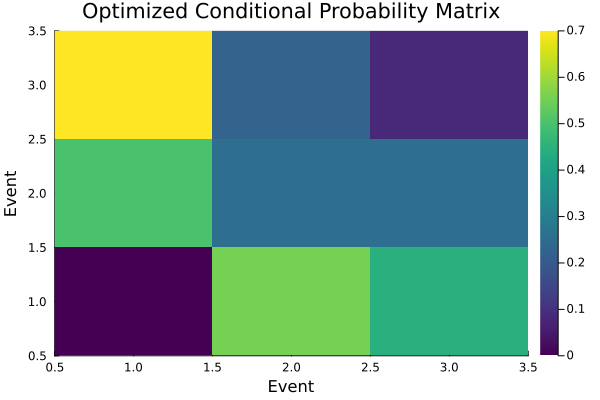

In [33]:
using JuMP
using GLPK
using Plots

# Define the pool of elements and their frequencies
pool = Set([1, 2, 3, 4, 5])
freq_pool = Dict(1 => 5, 2 => 3, 3 => 2, 4 => 4, 5 => 1)

# Define the sets
set_A = Set([1, 2, 3])
set_B = Set([2, 3, 4])
set_C = Set([1, 5, 3])

# Function to calculate weighted conditional probability
function weighted_conditional_probability(set_A, set_B, freq_pool)
    intersection = intersect(set_A, set_B)
    numerator = sum(freq_pool[x] for x in intersection)
    denominator = sum(freq_pool[x] for x in set_B)
    return numerator / denominator
end

# Number of events
num_events = 3

# Initialize the conditional probability matrix
C = zeros(Float64, num_events, num_events)

# Fill the matrix according to the given rules
sets = [set_A, set_B, set_C]
for i in 1:num_events
    for j in 1:num_events
        if i == j
            C[i, j] = 1.0
        else
            C[i, j] = weighted_conditional_probability(sets[i], sets[j], freq_pool)
        end
    end
end

println("Initial Conditional Probability Matrix C:")
println(C)

# Define the optimization model using JuMP
model = Model(GLPK.Optimizer)

# Define the decision variables
@variable(model, P[1:num_events, 1:num_events] >= 0)

# Define the objective function (example: maximize the sum of probabilities)
@objective(model, Max, sum(P))

# Add constraints (example: probabilities must sum to 1 for each event)
for i in 1:num_events
    @constraint(model, sum(P[i, :]) == 1)
end

# Add constraints based on the initial conditional probability matrix
for i in 1:num_events
    for j in 1:num_events
        if i != j
            @constraint(model, P[i, j] == C[i, j])
        end
    end
end

# Solve the optimization problem
optimize!(model)

# Extract the optimized probabilities
optimized_P = value.(P)

println("Optimized Conditional Probability Matrix P:")
println(optimized_P)

# Visualize the optimized conditional probability matrix using a heatmap
heatmap(optimized_P, title="Optimized Conditional Probability Matrix", xlabel="Event", ylabel="Event", color=:viridis)

In [37]:
# Define the initial state vector (example: starting with equal probabilities)
initial_state = [1/num_events for _ in 1:num_events]

# Function to project future state
function project_future_state(initial_state, transition_matrix, steps)
    state = initial_state'
    for _ in 1:steps
        state = state * transition_matrix
    end
    return state
end

# Project the future state after a given number of steps
steps = 5
future_state = project_future_state(initial_state, optimized_P, steps)

println("Future state after $steps steps:")
println(future_state)

# Define a mapping from states to pool elements
state_to_element = Dict(1 => 1, 2 => 2, 3 => 3)  # Example mapping

# Map the projected state to pool elements
projected_elements = Dict(state_to_element[i] => future_state[i] for i in 1:num_events)

println("Projected state using pool elements:")
println(projected_elements)

Future state after 5 steps:
[0.37381528609713965 0.35333581973057687 0.2728488941722834]
Projected state using pool elements:
Dict(2 => 0.35333581973057687, 3 => 0.2728488941722834, 1 => 0.37381528609713965)
